# Unsupervised Learning: Clustering and Dimensionality Reduction


## Introduction

Unsupervised learning techniques are applied to discover hidden patterns in student performance data without using predefined labels. Clustering is used to group students based on similar academic characteristics, while dimensionality reduction is applied to simplify the data and improve interpretability.




## Dataset Preparation

For unsupervised analysis, only numerical features related to academic performance and behavior are selected. The target variable is excluded, as unsupervised learning does not rely on labeled outcomes.




## Feature Scaling

Feature scaling is applied to ensure that all attributes contribute equally to the distance-based clustering process. This step is essential for algorithms such as K-Means that rely on distance calculations.


In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/student_performance.csv", sep=';')

features = ['studytime', 'absences', 'G1', 'G2', 'failures']
X = df[features]


The selected features represent student academic behavior and prior performance, which are suitable for grouping students based on similarity.


In [2]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Feature scaling is applied to ensure that all attributes contribute equally to the distance-based clustering process.


## K-Means Clustering

K-Means clustering is used to group students into clusters based on similarity in academic behavior and performance. The number of clusters is selected to represent meaningful student groups.


In [3]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters
df['cluster'].value_counts()


cluster
0    199
1    154
2     42
Name: count, dtype: int64

## Cluster Interpretation

The identified clusters are analyzed to understand the characteristics of each student group and their academic behavior.


In [4]:
df.groupby('cluster')[features].mean()


,studytime,absences,G1,G2,failures
cluster,,,,,
0,2.075377,6.989950,9.110553,8.919598,0.150754
1,2.136364,4.292208,14.305195,14.214286,0.084416
2,1.476190,4.833333,6.976190,6.380952,2.119048


### Interpretation:
- One cluster represents students with strong internal assessment scores and lower risk.
- Another cluster captures moderate performers.
- A third cluster highlights students with lower performance and higher academic risk.


## Principal Component Analysis (PCA)

PCA is applied to reduce the dimensionality of the dataset while retaining maximum variance. This helps in visualizing clusters and understanding dominant performance factors.


In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.43021375 0.20755412]


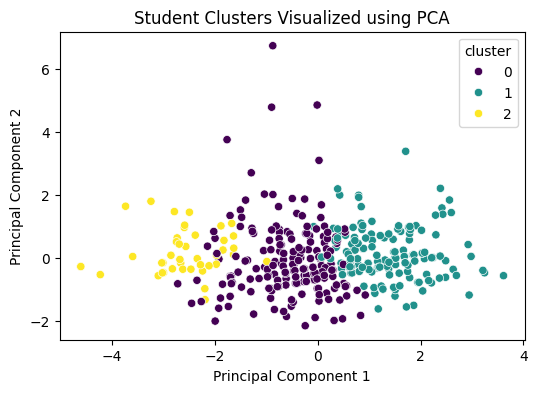

In [6]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette='viridis')
plt.title("Student Clusters Visualized using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


## PCA Interpretation

- The first principal component captures the majority of variance related to academic performance.
- The second component represents secondary behavioral factors.
- PCA enables clear visualization of student clusters in reduced dimensions.


## Decision Support Perspective

Clustering reveals natural groupings of students without predefined labels. These insights complement supervised learning by identifying student segments that may benefit from targeted academic interventions.


## Conclusion

Unsupervised learning techniques successfully uncovered hidden patterns in student performance data. K-Means clustering identified meaningful student groups, and PCA improved interpretability by reducing dimensionality. These results enhance the decision support capabilities of the system.
